## Understanding Word Vectors usage with Spacy Word and Sentence Similarity

## [Link to my Youtube Video Explaining this whole Notebook](https://www.youtube.com/watch?v=SzSANHjYhfg&list=PLxqBkZuBynVTn2lkHNAcw6lgm1MD5QiMK&index=6)

[![Imgur](https://imgur.com/E1fN7T4.png)](https://www.youtube.com/watch?v=SzSANHjYhfg&list=PLxqBkZuBynVTn2lkHNAcw6lgm1MD5QiMK&index=6)


### A word vector is basically a dense representation of a word.



There is more than one way to produce word vectors. Let's look at the most popular pretrained vectors and how they are trained:

### word2vec

### Glove vectors

### fastText

In [2]:
import spacy

# nlp = spacy.load("en_core_web_sm")
nlp = spacy.load("en_core_web_md")

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [7]:
doc = nlp("I bought BitCoin")

# print(doc[1])

doc[1].vector

doc[1].vector.shape




(300,)

### out-of-vocabulary


Only the words in the model's vocabulary have vectors; words that are not in the 
vocabulary are called OOV (out-of-vocabulary) words. 

In [8]:
doc = nlp("You went there afskfsd.")

for token in doc:
    print(token.is_oov, token.has_vector)


False True
False True
False True
True False
False True


In [10]:
doc = nlp("You went there afskfsd.")

for token in doc:
    print(token)

You
went
there
afskfsd
.


# The similarity method

In spaCy, every container type object has a similarity method that allows us to calculate the semantic similarity of other container objects by comparing their word vectors.


https://spacy.io/usage/linguistic-features#similarity-expectations

In [11]:
doc1 = nlp("I bought BitCoin")

doc2 = nlp("I purchased Stock")

print(doc1[1:3].similarity(doc2[1:4]))

0.6873385906219482


### Limitation of Similarity

These two sentences should not be 90% similar they have very different meanings

In [12]:
search_doc = nlp("This was very strange argument between american and british person")

main_doc = nlp("He was from Japan, but a true English gentleman in my eyes.")

print(main_doc.similarity(search_doc))

0.9348879165307562


In [13]:
search_doc = nlp("This was very strange argument between american and british person")

main_doc = nlp("He was from Japan, but a true English gentleman in my eyes, and another one of the reasons as to why I liked going to school.")

search_doc_no_stop_words = nlp(' '.join([str(t) for t in search_doc if not t.is_stop]))

main_doc_no_stop_words = nlp(' '.join([str(t) for t in main_doc if not t.is_stop]))

print(search_doc_no_stop_words.similarity(main_doc_no_stop_words))

0.7954015264714663


## Distance Visualization

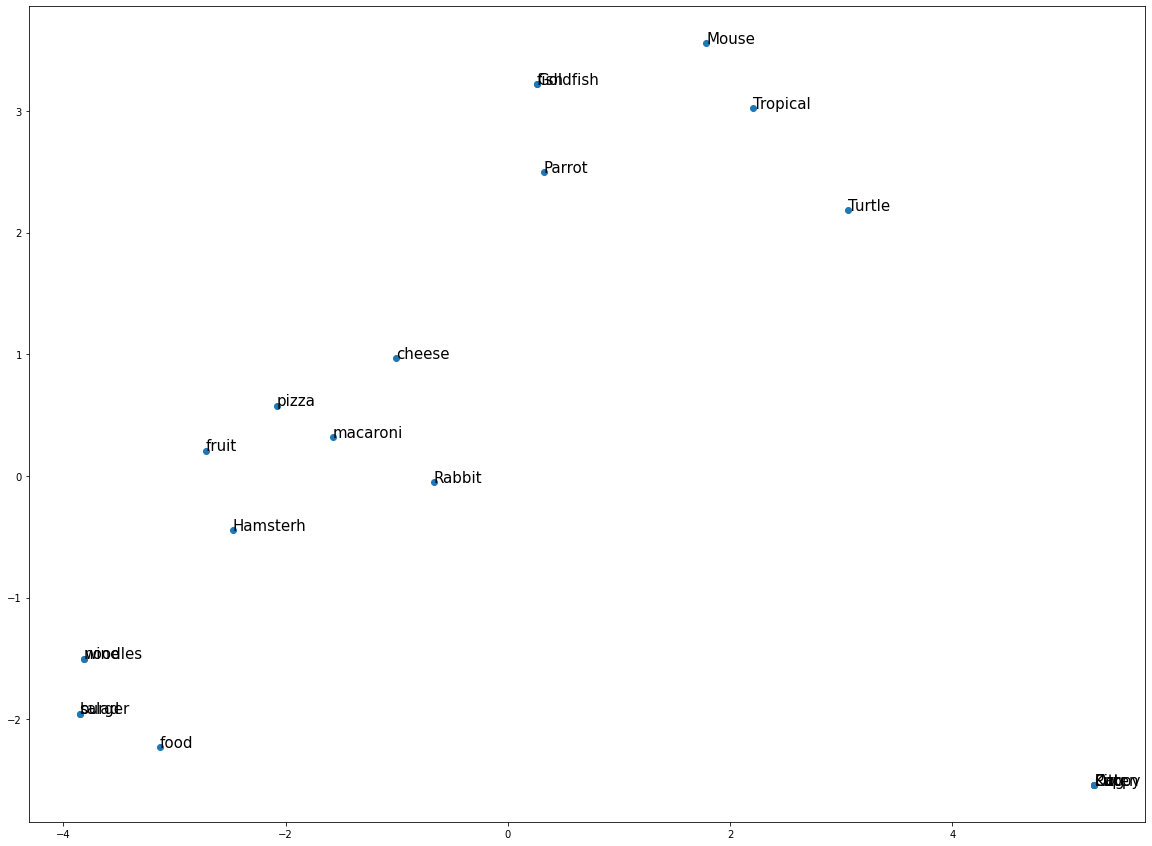

In [14]:
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
import numpy as np 

vocab = nlp("Dog Puppy Turtle Rabbit Parrot Cat Kitten Goldfish Mouse Tropical fish Hamsterh burger pizza food cheese wine salad noodles macaroni fruit vegetable") 

words = [word.text for word in vocab]

vecs = np.vstack([word.vector for word in vocab if word.has_vector ])

pca = PCA(n_components=2)

vecs_transformed = pca.fit_transform(vecs)

plt.figure(figsize=(20, 15))

plt.scatter(vecs_transformed[:, 0], vecs_transformed[:, 1])

for word, coord in zip(words, vecs_transformed ):
    x, y = coord
    plt.text(x, y, word, size=15)

# Sentence similarity with Spacy

### Understanding semantic similarity

semantic similarity is a metric that's defined over texts, where the distance between two texts is based on their semantics.


![](2022-06-17-15-29-44.png)

What does Euclidian distance mean for word vectors? First, Euclidian distance has no idea
of vector orientation; what matters is the vector magnitude.

This is the main drawback of using Euclidian distance for semantic similarity – the
orientation of the two vectors in the space is not taken into account.


### There's another way of calculating similarity that addresses this problem, called cosine similarity. 

![](2022-06-17-15-30-43.png)

![](2022-06-17-04-11-13.png)

Contrary to Euclidian distance, cosine distance is more concerned with the orientation of the two vectors in the space. The cosine similarity of two vectors is basically the cosine of the angle that's created by these two vectors.

![](2022-06-17-04-11-13.png)


### spaCy uses cosine similarity to calculate semantic similarity. Hence, calling the similarity method helps us make cosine similarity calculations.



In [16]:
doc1 = nlp(u'the person wear red T-shirt')

doc2 = nlp(u'this person is walking')

doc3 = nlp(u'the boy wear red T-shirt')


print(doc1.similarity(doc2)) 

print(doc1.similarity(doc3))

print(doc2.similarity(doc3))

0.4609855393976771
0.9571343794542809
0.3738631487509084


In [ ]:
def remove_pronouns(text):
    doc = nlp(text)
    result = [token for token in doc if token.lemma_ != '-PRON-' ]
    return " ".join(result)